In [30]:
# -*- coding: utf-8 -*-
""" 
Created on Thu sept 15 2022

@author: Sayak Ghosh
"""
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.express as px
from seaborn import heatmap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
payment = pd.read_csv("payment.csv")


In [3]:
payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
payment.shape

(6362620, 11)

In [6]:
print(list(payment.columns))

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
# step: represents a unit of time where 1 step equals 1 hour
# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction
# isFraud: fraud transaction

In [7]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
payment.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
payment.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
payment['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
payment['nameOrig'].value_counts()

C545315117     3
C1784010646    3
C2098525306    3
C1832548028    3
C1530544995    3
              ..
C708630069     1
C1414388866    1
C2135321404    1
C1363345119    1
C1039343440    1
Name: nameOrig, Length: 6353307, dtype: int64

In [19]:
type_transaction = payment["type"].value_counts()
transaction = type_transaction.index
quantity = type_transaction.values

# plotting pie chart
fig = px.pie(payment,
            values = quantity,
            names = transaction, 
            hole = 0.3,
            title = "Distribution of Transaction Type")
fig.show()

In [22]:
#check co-relation between features with isFraud
corr = payment.corr()
corr["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

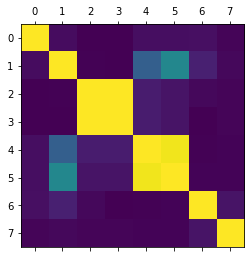

In [24]:
# correlation HeatMap between the features of the data with the isFraud column
import matplotlib.pyplot as plt
plt.matshow(payment.corr())
plt.show()

<AxesSubplot:>

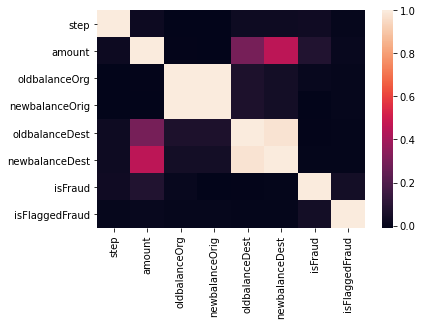

In [28]:
#Payments Corelation HeatMap

heatmap(payment.corr())

In [32]:
#process the data 
labelencoder = LabelEncoder()
payment['type'] = labelencoder.fit_transform(payment['type'])

In [38]:
print(payment['type'])
payment['type'].value_counts()

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int32


1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [34]:
payment['isFraud'] =  payment['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [35]:
payment['isFraud']

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
6362615       Fraud
6362616       Fraud
6362617       Fraud
6362618       Fraud
6362619       Fraud
Name: isFraud, Length: 6362620, dtype: object

In [36]:
payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [37]:
payment.to_csv('payment2.csv', index=False)